In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataset

In [2]:
# To load the dataset, write the function below
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = dataset.load_dataset()

# of train samples=  209 # of cats=  72 , # of non-cats=  137
# of test samples=  50 # of cats=  33 , # of non-cats=  17


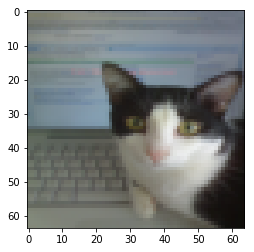

y = 1, it's a 'cat' picture.


In [3]:
# Example of a picture (make sure everything is working well)
index = 25
plt.imshow(train_set_x_orig[index])
plt.show()
print ("y = " + str(train_set_y[0][index]) + ", it's a '" + classes[int(train_set_y[0][index])] +  "' picture.") 

In [5]:
print(train_set_x_orig.shape)

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("\nEach image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


(209, 64, 64, 3)
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64

Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [6]:
# Reshape the training and test examples
print (train_set_x_orig.shape)

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


(209, 64, 64, 3)
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [11]:
# Preprocessing
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


In [12]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

In [13]:
# initialize wights and biases
def initialize_with_zeros(dim):   
    w = np.zeros((dim,1))
    b = 0
    return w, b

In [14]:
# PROPAGATION (for all examples)
def propagate(w, b, X, Y):
    
    # FORWARD PROPAGATION (FROM X TO COST)
    m = X.shape[1]
    A = sigmoid( np.dot(w.T,X) + b ) # compute activation for each example
    
    cost = -1/m * np.sum((Y*np.log(A) + (1-Y)*np.log(1-A))) # compute cost for all examples
    
    # BACKWARD PROPAGATION (TO FIND GRADIENTS)
    dw = 1/m * np.dot(X,  (A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [15]:
# optimization
def optimize(w, b, X, Y, num_iterations, learning_rate):

    costs = []
    
    for i in range(num_iterations):
     
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update wights and biases
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record and print the costs
        if i % 100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
         
    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [16]:
# predict
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b)
   
    for i in range(m):   
        Y_prediction[0][i] = np.round(A[0][i])
        
    return Y_prediction

In [17]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Accuracy
    print("train accuracy: ", 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100 , "%")
    print("test accuracy: ", 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100 , "%")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [28]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 200000, learning_rate = 0.005)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Cost after iteration 2000: 0.135608
Cost after iteration 2100: 0.130708
Cost after iteration 2200: 0.126137
Cost after iteration 2300: 0.121861
Cost after iteration 2400: 0.117855
Cost after iteration 2500: 0.114093
Cost after iteration 2600: 0.110554
Cost after iteration 2700: 0.107219
Cost

Cost after iteration 22500: 0.014210
Cost after iteration 22600: 0.014146
Cost after iteration 22700: 0.014083
Cost after iteration 22800: 0.014020
Cost after iteration 22900: 0.013958
Cost after iteration 23000: 0.013896
Cost after iteration 23100: 0.013835
Cost after iteration 23200: 0.013774
Cost after iteration 23300: 0.013714
Cost after iteration 23400: 0.013654
Cost after iteration 23500: 0.013595
Cost after iteration 23600: 0.013537
Cost after iteration 23700: 0.013478
Cost after iteration 23800: 0.013421
Cost after iteration 23900: 0.013364
Cost after iteration 24000: 0.013307
Cost after iteration 24100: 0.013251
Cost after iteration 24200: 0.013195
Cost after iteration 24300: 0.013140
Cost after iteration 24400: 0.013085
Cost after iteration 24500: 0.013031
Cost after iteration 24600: 0.012977
Cost after iteration 24700: 0.012923
Cost after iteration 24800: 0.012870
Cost after iteration 24900: 0.012818
Cost after iteration 25000: 0.012765
Cost after iteration 25100: 0.012714
C

Cost after iteration 44700: 0.007063
Cost after iteration 44800: 0.007047
Cost after iteration 44900: 0.007031
Cost after iteration 45000: 0.007015
Cost after iteration 45100: 0.007000
Cost after iteration 45200: 0.006984
Cost after iteration 45300: 0.006968
Cost after iteration 45400: 0.006952
Cost after iteration 45500: 0.006937
Cost after iteration 45600: 0.006921
Cost after iteration 45700: 0.006906
Cost after iteration 45800: 0.006891
Cost after iteration 45900: 0.006875
Cost after iteration 46000: 0.006860
Cost after iteration 46100: 0.006845
Cost after iteration 46200: 0.006830
Cost after iteration 46300: 0.006815
Cost after iteration 46400: 0.006800
Cost after iteration 46500: 0.006785
Cost after iteration 46600: 0.006770
Cost after iteration 46700: 0.006756
Cost after iteration 46800: 0.006741
Cost after iteration 46900: 0.006726
Cost after iteration 47000: 0.006712
Cost after iteration 47100: 0.006697
Cost after iteration 47200: 0.006683
Cost after iteration 47300: 0.006668
C

Cost after iteration 66900: 0.004688
Cost after iteration 67000: 0.004681
Cost after iteration 67100: 0.004674
Cost after iteration 67200: 0.004667
Cost after iteration 67300: 0.004660
Cost after iteration 67400: 0.004653
Cost after iteration 67500: 0.004646
Cost after iteration 67600: 0.004639
Cost after iteration 67700: 0.004632
Cost after iteration 67800: 0.004625
Cost after iteration 67900: 0.004618
Cost after iteration 68000: 0.004611
Cost after iteration 68100: 0.004604
Cost after iteration 68200: 0.004597
Cost after iteration 68300: 0.004590
Cost after iteration 68400: 0.004584
Cost after iteration 68500: 0.004577
Cost after iteration 68600: 0.004570
Cost after iteration 68700: 0.004563
Cost after iteration 68800: 0.004557
Cost after iteration 68900: 0.004550
Cost after iteration 69000: 0.004543
Cost after iteration 69100: 0.004536
Cost after iteration 69200: 0.004530
Cost after iteration 69300: 0.004523
Cost after iteration 69400: 0.004517
Cost after iteration 69500: 0.004510
C

Cost after iteration 89100: 0.003506
Cost after iteration 89200: 0.003502
Cost after iteration 89300: 0.003498
Cost after iteration 89400: 0.003494
Cost after iteration 89500: 0.003490
Cost after iteration 89600: 0.003486
Cost after iteration 89700: 0.003482
Cost after iteration 89800: 0.003478
Cost after iteration 89900: 0.003474
Cost after iteration 90000: 0.003470
Cost after iteration 90100: 0.003466
Cost after iteration 90200: 0.003462
Cost after iteration 90300: 0.003458
Cost after iteration 90400: 0.003454
Cost after iteration 90500: 0.003451
Cost after iteration 90600: 0.003447
Cost after iteration 90700: 0.003443
Cost after iteration 90800: 0.003439
Cost after iteration 90900: 0.003435
Cost after iteration 91000: 0.003431
Cost after iteration 91100: 0.003428
Cost after iteration 91200: 0.003424
Cost after iteration 91300: 0.003420
Cost after iteration 91400: 0.003416
Cost after iteration 91500: 0.003412
Cost after iteration 91600: 0.003409
Cost after iteration 91700: 0.003405
C

Cost after iteration 111000: 0.002806
Cost after iteration 111100: 0.002804
Cost after iteration 111200: 0.002801
Cost after iteration 111300: 0.002799
Cost after iteration 111400: 0.002796
Cost after iteration 111500: 0.002793
Cost after iteration 111600: 0.002791
Cost after iteration 111700: 0.002788
Cost after iteration 111800: 0.002786
Cost after iteration 111900: 0.002783
Cost after iteration 112000: 0.002781
Cost after iteration 112100: 0.002778
Cost after iteration 112200: 0.002776
Cost after iteration 112300: 0.002773
Cost after iteration 112400: 0.002771
Cost after iteration 112500: 0.002768
Cost after iteration 112600: 0.002766
Cost after iteration 112700: 0.002763
Cost after iteration 112800: 0.002761
Cost after iteration 112900: 0.002758
Cost after iteration 113000: 0.002756
Cost after iteration 113100: 0.002753
Cost after iteration 113200: 0.002751
Cost after iteration 113300: 0.002749
Cost after iteration 113400: 0.002746
Cost after iteration 113500: 0.002744
Cost after i

Cost after iteration 132600: 0.002344
Cost after iteration 132700: 0.002343
Cost after iteration 132800: 0.002341
Cost after iteration 132900: 0.002339
Cost after iteration 133000: 0.002337
Cost after iteration 133100: 0.002336
Cost after iteration 133200: 0.002334
Cost after iteration 133300: 0.002332
Cost after iteration 133400: 0.002330
Cost after iteration 133500: 0.002328
Cost after iteration 133600: 0.002327
Cost after iteration 133700: 0.002325
Cost after iteration 133800: 0.002323
Cost after iteration 133900: 0.002321
Cost after iteration 134000: 0.002320
Cost after iteration 134100: 0.002318
Cost after iteration 134200: 0.002316
Cost after iteration 134300: 0.002314
Cost after iteration 134400: 0.002313
Cost after iteration 134500: 0.002311
Cost after iteration 134600: 0.002309
Cost after iteration 134700: 0.002308
Cost after iteration 134800: 0.002306
Cost after iteration 134900: 0.002304
Cost after iteration 135000: 0.002302
Cost after iteration 135100: 0.002301
Cost after i

Cost after iteration 154200: 0.002013
Cost after iteration 154300: 0.002012
Cost after iteration 154400: 0.002010
Cost after iteration 154500: 0.002009
Cost after iteration 154600: 0.002008
Cost after iteration 154700: 0.002006
Cost after iteration 154800: 0.002005
Cost after iteration 154900: 0.002004
Cost after iteration 155000: 0.002003
Cost after iteration 155100: 0.002001
Cost after iteration 155200: 0.002000
Cost after iteration 155300: 0.001999
Cost after iteration 155400: 0.001997
Cost after iteration 155500: 0.001996
Cost after iteration 155600: 0.001995
Cost after iteration 155700: 0.001993
Cost after iteration 155800: 0.001992
Cost after iteration 155900: 0.001991
Cost after iteration 156000: 0.001990
Cost after iteration 156100: 0.001988
Cost after iteration 156200: 0.001987
Cost after iteration 156300: 0.001986
Cost after iteration 156400: 0.001984
Cost after iteration 156500: 0.001983
Cost after iteration 156600: 0.001982
Cost after iteration 156700: 0.001981
Cost after i

Cost after iteration 175800: 0.001764
Cost after iteration 175900: 0.001763
Cost after iteration 176000: 0.001762
Cost after iteration 176100: 0.001761
Cost after iteration 176200: 0.001760
Cost after iteration 176300: 0.001759
Cost after iteration 176400: 0.001758
Cost after iteration 176500: 0.001757
Cost after iteration 176600: 0.001756
Cost after iteration 176700: 0.001755
Cost after iteration 176800: 0.001754
Cost after iteration 176900: 0.001753
Cost after iteration 177000: 0.001752
Cost after iteration 177100: 0.001751
Cost after iteration 177200: 0.001750
Cost after iteration 177300: 0.001749
Cost after iteration 177400: 0.001748
Cost after iteration 177500: 0.001747
Cost after iteration 177600: 0.001746
Cost after iteration 177700: 0.001745
Cost after iteration 177800: 0.001744
Cost after iteration 177900: 0.001743
Cost after iteration 178000: 0.001742
Cost after iteration 178100: 0.001741
Cost after iteration 178200: 0.001740
Cost after iteration 178300: 0.001739
Cost after i

Cost after iteration 197400: 0.001569
Cost after iteration 197500: 0.001568
Cost after iteration 197600: 0.001567
Cost after iteration 197700: 0.001567
Cost after iteration 197800: 0.001566
Cost after iteration 197900: 0.001565
Cost after iteration 198000: 0.001564
Cost after iteration 198100: 0.001564
Cost after iteration 198200: 0.001563
Cost after iteration 198300: 0.001562
Cost after iteration 198400: 0.001561
Cost after iteration 198500: 0.001560
Cost after iteration 198600: 0.001560
Cost after iteration 198700: 0.001559
Cost after iteration 198800: 0.001558
Cost after iteration 198900: 0.001557
Cost after iteration 199000: 0.001556
Cost after iteration 199100: 0.001556
Cost after iteration 199200: 0.001555
Cost after iteration 199300: 0.001554
Cost after iteration 199400: 0.001553
Cost after iteration 199500: 0.001552
Cost after iteration 199600: 0.001552
Cost after iteration 199700: 0.001551
Cost after iteration 199800: 0.001550
Cost after iteration 199900: 0.001549
train accura

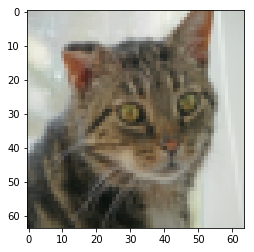

y = [1], you predicted that it is a "non-cat" picture.


In [19]:
# Example of a picture that was wrongly classified.
index = 1

plt.imshow(test_set_x.T[index].reshape((num_px, num_px, 3)))
plt.show()
print ("y = " + str(test_set_y.T[index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])]+  "\" picture.")

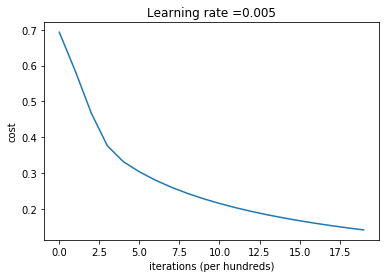

In [20]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()